In [1041]:
import bs4
from bs4 import BeautifulSoup as bs
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [1061]:
seph1=pd.read_csv('sephora_data_overall_updated.csv')
#seph2=pd.read_csv('sephora_sunscreen_data.csv')
#seph3=pd.read_csv('sephora_mist_data.csv')
#the above excel sheets need to be combined
#seph2=pd.read_csv('sephora_mask_data.csv')
ulta1=pd.read_csv('ulta_toner_data.csv')
ulta2=pd.read_csv('ulta_serum_data.csv')

In [1062]:
product_list=['toner','serum','cushion','face cream','face masks', 'face oils', 'cleanser','sunscreen']
ingred=['Ascorbic Acid', 'Niacinamide', 'Retinol', 'Ceramide', 'Squalane', 'Hyaluronic Acid', 'Vitamin E', 'Titanium Dioxide', 
        'Glycolic Acid','Sodium Acetate', 'Sodium Benzoate','Sodium Hyaluronate','Panthenol']
category=['vegan','Fragrance-Free','Normal']
skin_type=['Oily','Dry','Combination','Sensitive','Normal']
usage=['protection','cleansing','hydrating','prevention']

In [1063]:
df=pd.DataFrame(seph1)
df.head()

,Website,brand,Product,Type,About,ingredients,Reviews,Price,Number of Likes,Number of Reviews
0,Sephora,AMOREPACIFIC,Color Control Cushion Compact Broad Spectrum S...,cushion,Which skin type is it good for?✔ Normal✔ Oily✔...,-Ethylhexyl Methoxycinnamate: 7%\n -Titanium ...,4 stars,$75.00,37500,1100
1,Sephora,Dior,Dreamskin Fresh Perfect Cushion Broad Spectrum...,cushion,What it is: A skincare compact that blurs the...,-Longoza Flower: Renowned for its exceptional...,4 stars,$82.00,20100,200
2,Sephora,Dior,Dior Forever Loose Cushion Powder,cushion,What it is: An ultra-fine loose powder for a l...,"-Wild-Pansy ExtractSynthetic Fluorphlogopite, ...",3.5 stars,$58.00,5100,9
3,Sephora,La Mer,The Luminous Lifting Cushion Foundation SPF 20...,cushion,What it is: A foundation with healing hydratio...,"-Titanium Dioxide 6.5%\nWater, Butylene Glyco...",4 stars,$125.00,12400,70
4,Sephora,Dior,Dreamskin Fresh Perfect Cushion Broad Spectrum...,cushion,What it is: A skincare compact that blurs the...,-Longoza Flower: Renowned for its exceptional...,4.5 stars,$42.00,9700,39


In [1064]:
df.drop_duplicates(subset='Product',keep='first',inplace=True,ignore_index=True)

In [1065]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Website            1002 non-null   object
 1   brand              1002 non-null   object
 2   Product            1002 non-null   object
 3   Type               1002 non-null   object
 4   About              1001 non-null   object
 5   ingredients        1002 non-null   object
 6   Reviews            1002 non-null   object
 7   Price              1002 non-null   object
 8   Number of Likes    1002 non-null   int64 
 9   Number of Reviews  1002 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 78.4+ KB


In [1066]:
#df.drop('index',axis=1,inplace=True)

In [1049]:
df.to_csv('sephora_data_overall.csv',index=False)

In [1067]:
df1=df.loc[~df['About'].str.contains('Normal').isnull()]
df1['Normal skin Type']=df1['About'].str.contains('Normal')
df1['Reviews']=df1['Reviews'].str.replace('stars','')
df1['Price']=df1['Price'].str.replace('$','')

C:\Users\hancc\AppData\Local\Temp/ipykernel_28616/63970575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Normal skin Type']=df1['About'].str.contains('Normal')
C:\Users\hancc\AppData\Local\Temp/ipykernel_28616/63970575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Reviews']=df1['Reviews'].str.replace('stars','')
C:\Users\hancc\AppData\Local\Temp/ipykernel_28616/63970575.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, sing

In [1072]:
df1['Normal skin Type']=df1['Normal skin Type'].astype(int)
df1['Oily skin Type']=df1['About'].str.contains('Oily').astype(int)
df1['Dry skin Type']=df1['About'].str.contains('Dry').astype(int)
df1['Combination skin Type']=df1['About'].str.contains('Combination').astype(int)
df1['Sensitive']=df1['About'].str.contains('Sensitive').astype(int)
df1['Reviews']=df1['Reviews'].astype(float)
df1['Price']=df1['Price'].astype(float)

C:\Users\hancc\AppData\Local\Temp/ipykernel_28616/724267786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Normal skin Type']=df1['Normal skin Type'].astype(int)
C:\Users\hancc\AppData\Local\Temp/ipykernel_28616/724267786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Oily skin Type']=df1['About'].str.contains('Oily').astype(int)
C:\Users\hancc\AppData\Local\Temp/ipykernel_28616/724267786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [1073]:
for i in ingred:
    df1[i]=df1['ingredients'].str.contains(i).astype(int)
df2=df1.drop(['Website','About','ingredients'],1)
#df2['Product']=df2['Product'].replace('\s+\&amp;','')
df2.head()

C:\Users\hancc\AppData\Local\Temp/ipykernel_28616/144173248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=df1['ingredients'].str.contains(i).astype(int)
C:\Users\hancc\AppData\Local\Temp/ipykernel_28616/144173248.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2=df1.drop(['Website','About','ingredients'],1)


,brand,Product,Type,Reviews,Price,Number of Likes,Number of Reviews,Normal skin Type,Oily skin Type,Dry skin Type,...,Ceramide,Squalane,Hyaluronic Acid,Vitamin E,Titanium Dioxide,Glycolic Acid,Sodium Acetate,Sodium Benzoate,Sodium Hyaluronate,Panthenol
0,AMOREPACIFIC,Color Control Cushion Compact Broad Spectrum S...,cushion,4.0,75.0,37500,1100,1,1,1,...,0,0,0,0,1,0,0,0,0,0
1,Dior,Dreamskin Fresh Perfect Cushion Broad Spectrum...,cushion,4.0,82.0,20100,200,1,1,1,...,0,0,0,0,1,0,0,1,0,0
2,Dior,Dior Forever Loose Cushion Powder,cushion,3.5,58.0,5100,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,La Mer,The Luminous Lifting Cushion Foundation SPF 20...,cushion,4.0,125.0,12400,70,1,1,1,...,0,0,0,0,1,0,0,0,0,0
4,Dior,Dreamskin Fresh Perfect Cushion Broad Spectrum...,cushion,4.5,42.0,9700,39,1,1,1,...,0,0,0,0,1,0,0,1,0,0


In [1074]:
df3=df2.drop(['brand','Product','Type','Reviews','Price'],1)

C:\Users\hancc\AppData\Local\Temp/ipykernel_28616/1965085935.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df3=df2.drop(['brand','Product','Type','Reviews','Price'],1)


In [1075]:
df2.to_csv('sephora_data_overall_updated_1.csv',index=False)

In [1076]:
skin_type=['Oily skin Type','Normal skin Type','Dry skin Type','Combination skin Type','Sensitive']
df4=df2.groupby(['Type']).agg('mean')
df4

,Reviews,Price,Number of Likes,Number of Reviews,Normal skin Type,Oily skin Type,Dry skin Type,Combination skin Type,Sensitive,Ascorbic Acid,...,Ceramide,Squalane,Hyaluronic Acid,Vitamin E,Titanium Dioxide,Glycolic Acid,Sodium Acetate,Sodium Benzoate,Sodium Hyaluronate,Panthenol
Type,,,,,,,,,,,,,,,,,,,,,
cleanser,4.357143,29.845893,34279.714286,738.339286,0.875000,0.857143,0.750000,0.857143,0.107143,0.035714,...,0.089286,0.178571,0.107143,0.017857,0.125000,0.160714,0.000000,0.410714,0.250000,0.125000
collagen,4.409091,44.908182,25320.000000,400.272727,0.545455,0.454545,0.545455,0.545455,0.000000,0.090909,...,0.181818,0.090909,0.363636,0.000000,0.181818,0.000000,0.000000,0.181818,0.272727,0.181818
cushion,4.222222,60.000000,12588.888889,197.555556,0.777778,0.666667,0.777778,0.777778,0.222222,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.444444,0.222222,0.000000,0.444444,0.444444,0.111111
face cream,4.226653,53.483006,26276.895792,454.595190,0.559118,0.474950,0.657315,0.515030,0.050100,0.064128,...,0.104208,0.204409,0.170341,0.050100,0.272545,0.048096,0.002004,0.314629,0.358717,0.168337
face masks,4.247283,44.075815,29268.195652,436.663043,0.885870,0.820652,0.798913,0.885870,0.076087,0.081522,...,0.059783,0.157609,0.103261,0.059783,0.233696,0.097826,0.000000,0.217391,0.304348,0.163043
face mist,4.191489,33.223404,37843.382979,489.978723,0.617021,0.553191,0.617021,0.617021,0.127660,0.021277,...,0.063830,0.106383,0.191489,0.042553,0.148936,0.021277,0.021277,0.255319,0.382979,0.191489
face oils,4.448276,57.827586,43481.862069,513.655172,0.862069,0.620690,0.931034,0.793103,0.103448,0.000000,...,0.068966,0.344828,0.034483,0.137931,0.034483,0.000000,0.000000,0.000000,0.068966,0.034483
serum,4.304054,56.188378,58627.027027,591.635135,0.905405,0.824324,0.891892,0.878378,0.040541,0.243243,...,0.121622,0.216216,0.310811,0.081081,0.135135,0.081081,0.000000,0.351351,0.540541,0.243243
sunscreen,4.108696,35.478261,43752.173913,974.000000,0.826087,0.695652,0.782609,0.739130,0.043478,0.000000,...,0.043478,0.086957,0.130435,0.043478,0.434783,0.000000,0.000000,0.086957,0.217391,0.000000


In [1077]:
#sns.pairplot(df2)

In [1078]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1001
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  1001 non-null   object 
 1   Product                1001 non-null   object 
 2   Type                   1001 non-null   object 
 3   Reviews                1001 non-null   float64
 4   Price                  1001 non-null   float64
 5   Number of Likes        1001 non-null   int64  
 6   Number of Reviews      1001 non-null   int64  
 7   Normal skin Type       1001 non-null   int32  
 8   Oily skin Type         1001 non-null   int32  
 9   Dry skin Type          1001 non-null   int32  
 10  Combination skin Type  1001 non-null   int32  
 11  Sensitive              1001 non-null   int32  
 12  Ascorbic Acid          1001 non-null   int32  
 13  Niacinamide            1001 non-null   int32  
 14  Retinol                1001 non-null   int32  
 15  Cera

In [1079]:
#list_features=['Reviews','Normal skin Type','Oily skin Type','Dry skin Type','Combination skin Type','Sensitive'
#              ,'Ascorbic Acid','Niacinamide','Retinol','Ceramide','Squalane','Hyaluronic Acid','Vitamin E',
#              'Titanium Dioxide','Sodium Acetate','Sodium Benzoate','Sodium Hyaluronate',
#              'Panthenol','X','Y','Z']
list_features=['Reviews','Normal skin Type','Oily skin Type','Dry skin Type','Combination skin Type','Sensitive'
              ,'Ascorbic Acid','Niacinamide','Retinol','Ceramide','Squalane','Hyaluronic Acid','Vitamin E','Sodium Hyaluronate',
              'X','Y','Z']
list_features=['Reviews','Normal skin Type','Oily skin Type','Dry skin Type','Combination skin Type','Sensitive',
              'X','Y','Z']

In [1080]:
y=df2['Price']
x=pd.get_dummies(df2['Reviews'],drop_first=True)

In [1081]:
summary=sm.OLS(y,x).fit().summary()

In [1082]:
X_train, X_test, y_train, y_test=train_test_split(df2[list_features],df2['Price'],test_size=0.25,random_state=49)

KeyError: "['X', 'Y', 'Z'] not in index"

In [1083]:
categorical_cols=[]
for var in df2.columns:
    if df2[var].dtype=='category':
        categorical_cols.append(var)
categorical_cols

[]

In [1084]:
def des_num(df,col_name):
    print(f"\nColumn: {col_name}")
    print(f"\nMinimum: {df[col_name].min()}")
    print(f"\nMaximum: {df[col_name].max()}")
    print(f"\nAverage: {df[col_name].mean()}")
    print(f"\nStandard Deviation: {df[col_name].std()}")
    print(f"\nMedian: {df[col_name].median()}")

In [1085]:
df2['brand']=df2['brand'].astype('category')
df2['Product']=df2['Product'].astype('category')
df2['Type']=df2['Type'].astype('category')

In [1086]:
for col in categorical_cols:
    count_map=X_train[col].value_counts().to_dict()
    X_train[col]=X_train[col].map(count_map)
    X_test[col]=X_test[col].map(count_map)

In [1087]:
X_train.drop(['brand','Product','Type','Price','X','Y','Z'],1,inplace=True)
X_test.drop(['brand','Product','Type','Price','X','Y','Z'],1,inplace=True)

C:\Users\hancc\AppData\Local\Temp/ipykernel_28616/2001338227.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train.drop(['brand','Product','Type','Price','X','Y','Z'],1,inplace=True)


KeyError: "['brand' 'Product' 'Type' 'Price'] not found in axis"

<AxesSubplot:>

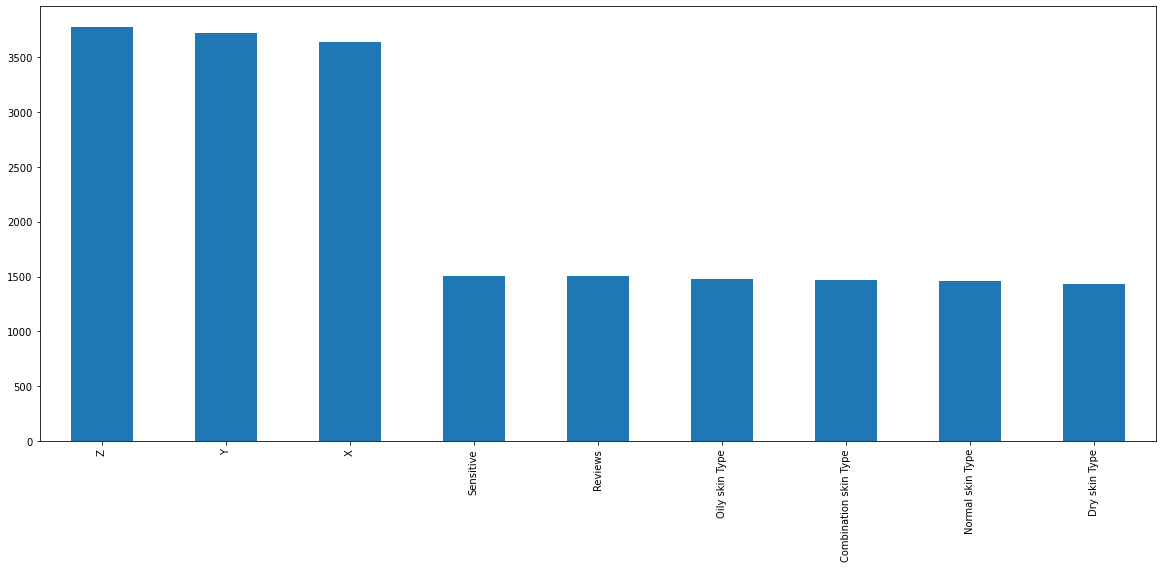

In [1088]:
mse_values=[]
for feature in X_train.columns:
    clf=DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(),y_train)
    y_scored=clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test,y_scored))
mse_values=pd.Series(mse_values)
mse_values.index=X_train.columns
mse_values.sort_values(ascending=False)
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [1089]:
scaler=StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler()

In [1090]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [1091]:
alphas=np.logspace(-2,2,200)
lasso_model=LassoCV(alphas=alphas,cv=kfold)
lasso_model.fit(X_train,y_train)
scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)
print("Linear Reg Mean Score: ", np.mean(scores))
print(r2_score(y_test, lasso_model.predict(X_test)))
print(lasso_model.alpha_)

Linear Reg Mean Score:  -0.01761308360440439
0.00851905068489378
27.36439997074672


In [1092]:
X_train_lasso=pd.DataFrame(X_train)
X_test_lasso=pd.DataFrame(X_test)

In [1093]:
lasso_Regression(X_train_lasso,X_test_lasso,y_train,y_test)

Lasso Regression R2 train: 0.019376935963257735
Lasso Regression MSE: 2299.451290812976
Lasso Regression R2 test: 0.023893268754227814
Lasso Regression MSE: 1454.7287730544829


In [1094]:
linear_Regression(X_train,X_test,y_train,y_test)

Lasso Regression R2 train: 0.019380924428182178
Lasso Regression MSE: 2299.4419383092923
Lasso Regression R2 test: 0.023604960451425905
Lasso Regression MSE: 1455.1584498205277


In [1095]:
alphas=10**np.linspace(-5,5,200)
ridge_model=RidgeCV(alphas=alphas,cv=kfold)
ridge_model.fit(X_train,y_train)
print(ridge_model.alpha_)

100000.0


In [1096]:
pred=ridge_model.predict(X_train)
print(f'Ridge Regression R2 train:{ridge_model.score(X_train,y_train)}')
print(f'Ridge Regression MSE: {mean_squared_error(y_train,pred)}')
pred=ridge_model.predict(X_test)
print(f'Ridge Regression R2 train:{ridge_model.score(X_test,y_test)}')
print(f'Ridge Regression MSE: {mean_squared_error(y_test,pred)}')


Ridge Regression R2 train:0.007638448143719501
Ridge Regression MSE: 2326.97673046327
Ridge Regression R2 train:0.009521641103734546
Ridge Regression MSE: 1476.1473532051548


In [948]:
pred=lr.predict(X_train)
    print(f'Lasso Regression R2 train: {lr.score(X_train,y_train)}')
    print(f'Lasso Regression MSE: {mean_squared_error(y_train,pred)}')
    pred=lr.predict(X_test)
    print(f'Lasso Regression R2 test: {lr.score(X_test,y_test)}')
    print(f'Lasso Regression MSE: {mean_squared_error(y_test,pred)}')

IndentationError: unexpected indent (Temp/ipykernel_28616/2836536615.py, line 2)

In [835]:
ridge_Regression(X_train,X_test,y_train,y_test)

Lasso Regression R2 train: 0.9999999999993703
Lasso Regression MSE: 1.2412586773745046e-09
Lasso Regression R2 test: 0.9999999999993281
Lasso Regression MSE: 1.6513679653463027e-09


In [836]:
elastic_Regression(X_train,X_test,y_train,y_test)

Lasso Regression R2 train: 0.9999997427687743
Lasso Regression MSE: 0.0005070510622199357
Lasso Regression R2 test: 0.9999997427677839
Lasso Regression MSE: 0.0006322507974424859


In [595]:
def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=kfold, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
#       plt.plot(np.log(df.alpha), df.mean_test_score);
        plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

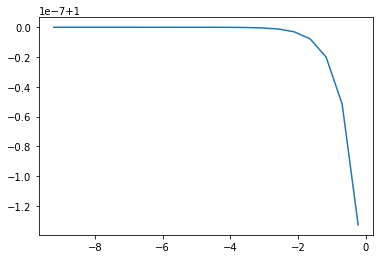

In [633]:
params = {
    "alpha": np.logspace(-4, -.1, 20)
}
grid_est=GridSearchCV(Lasso(),param_grid=params, cv=kfold,return_train_score=False)
grid_est.fit(X_train,y_train)
df5=pd.DataFrame(grid_est.cv_results_)
df5['alpha']=df5.params.apply(lambda val: val['alpha'])
plt.plot(np.log(df5.alpha),df5.mean_test_score)

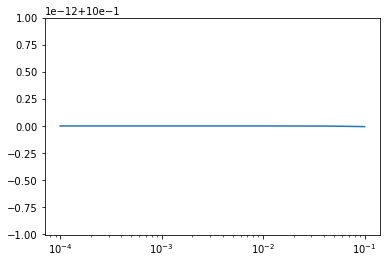

In [597]:
ridge_grid_est = build_grid_search_est(Ridge(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, -1, 10))

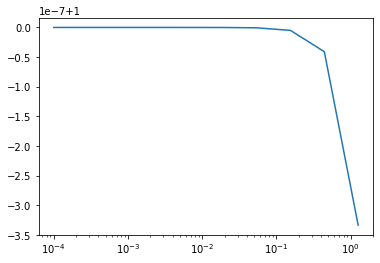

In [598]:
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train, y_train, cv=kfold,
                                             alpha=np.logspace(-4, 0.1, 10))

In [604]:
df6=df2.drop(ingred,1)

C:\Users\hancc\AppData\Local\Temp/ipykernel_28616/1194881879.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df6=df2.drop(ingred,1)


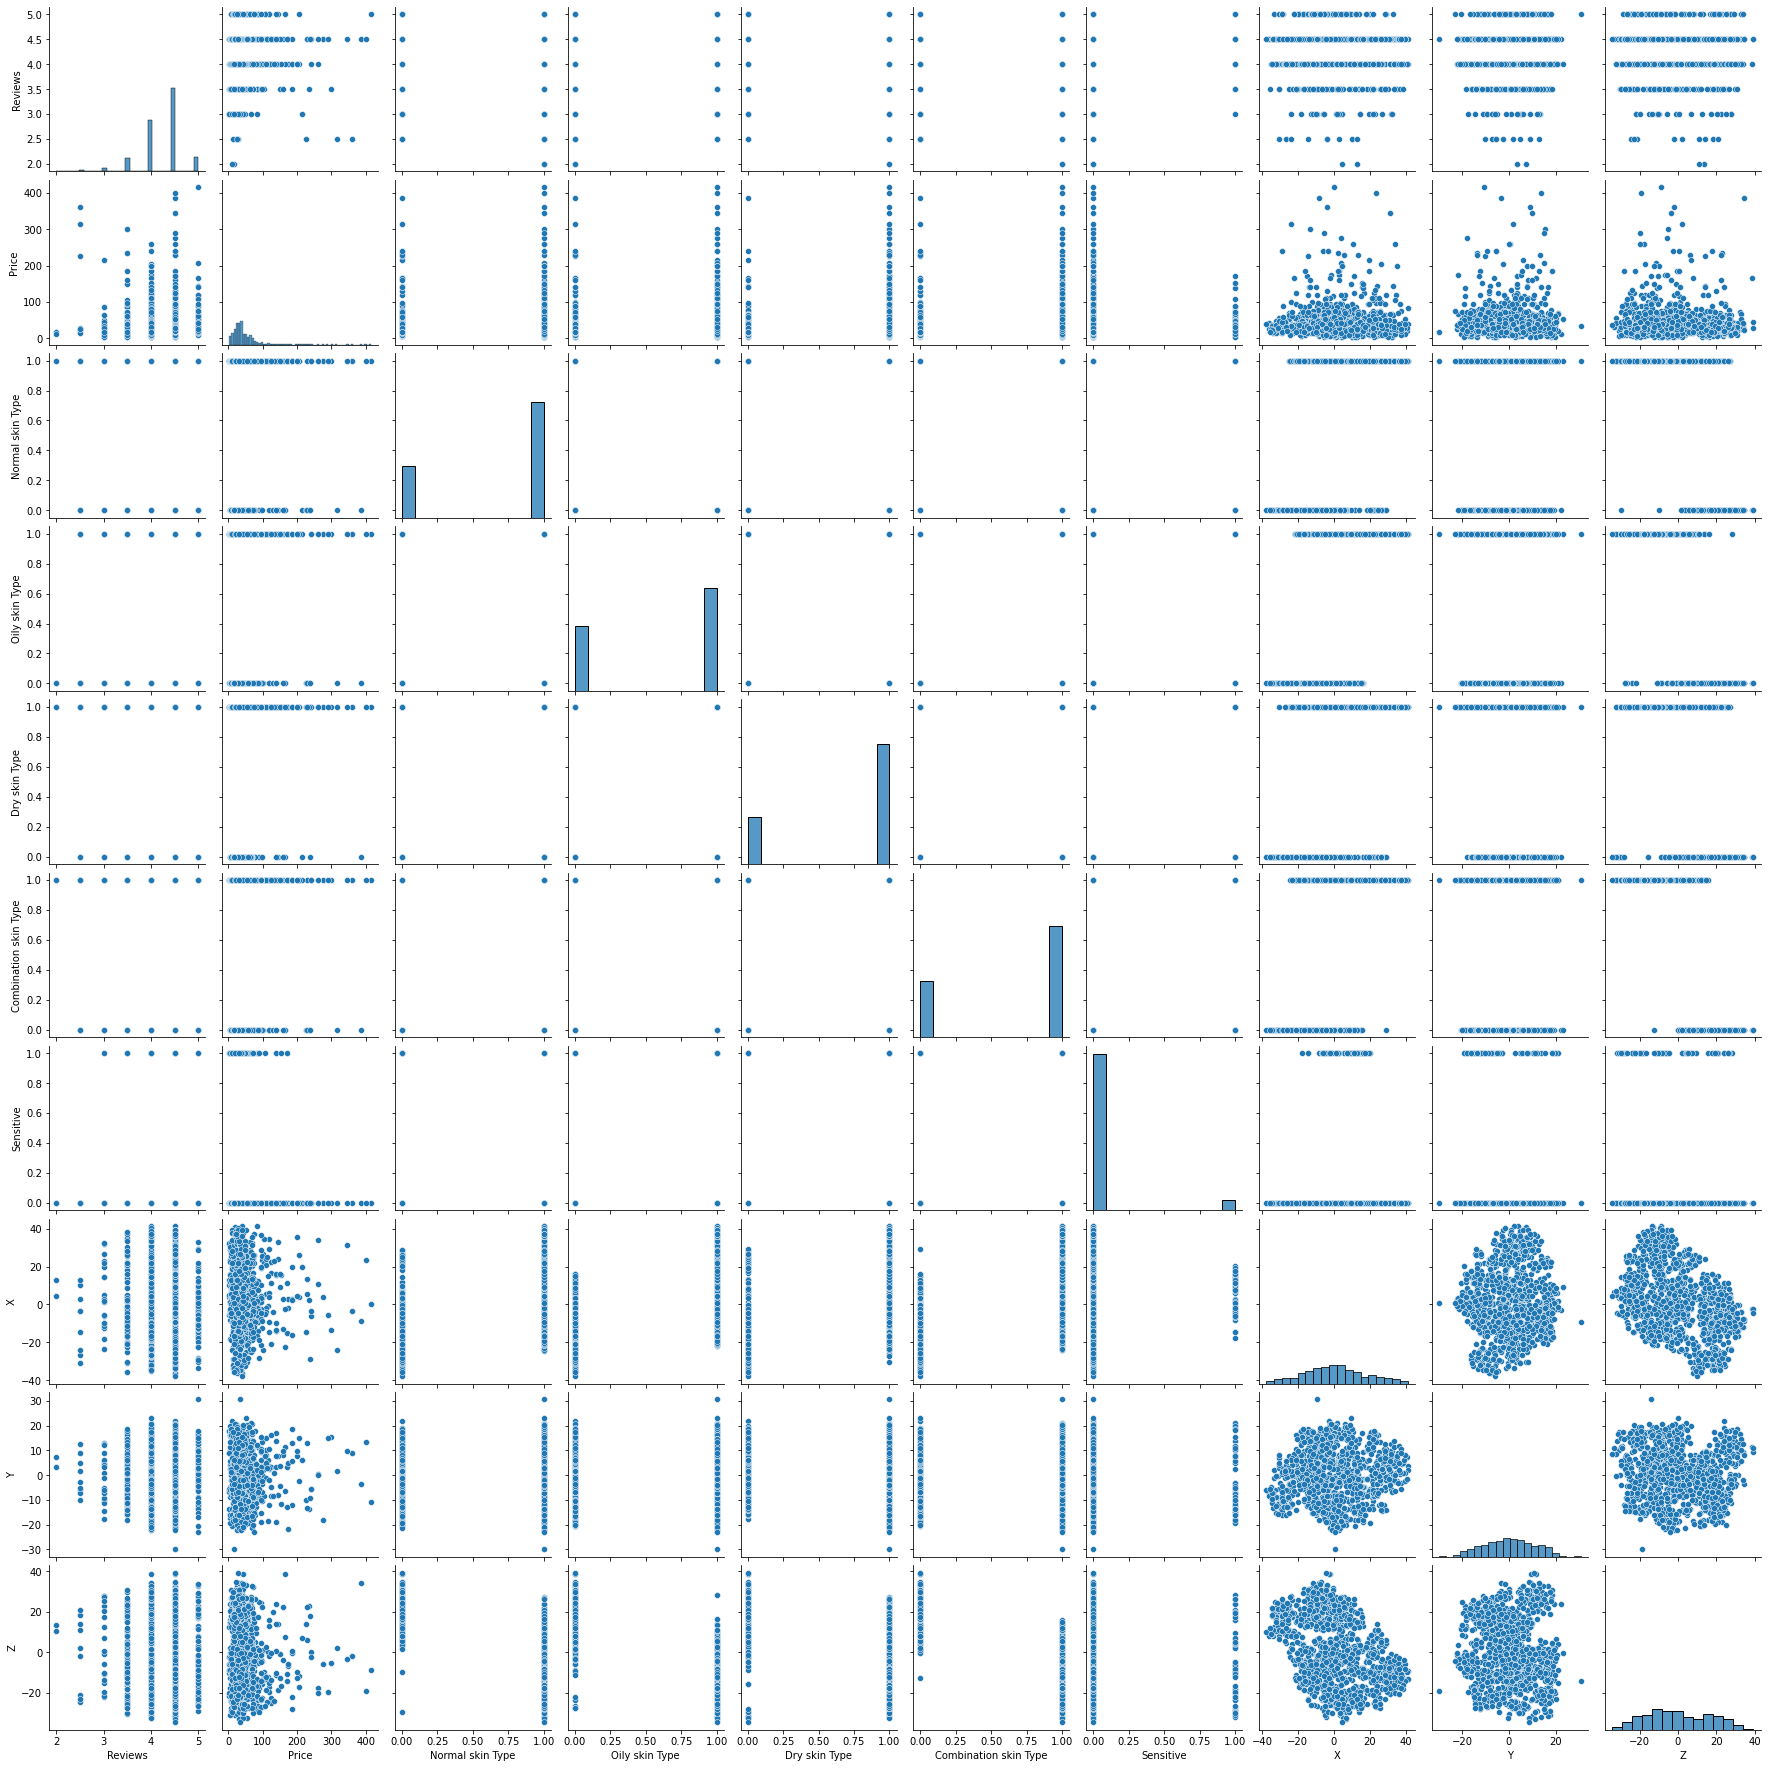

In [605]:
sns.pairplot(df6)

In [614]:
df6.corr()

,Reviews,Price,Normal skin Type,Oily skin Type,Dry skin Type,Combination skin Type,Sensitive,X,Y,Z
Reviews,1.000000,0.004664,0.034166,0.031059,0.032715,0.004602,-0.005100,-0.032603,0.041920,-0.004900
Price,0.004664,1.000000,0.096773,0.099497,0.136512,0.107697,-0.007027,0.043848,-0.005288,-0.098055
Normal skin Type,0.034166,0.096773,1.000000,0.721571,0.686731,0.799892,0.129787,0.465989,0.146735,-0.752866
Oily skin Type,0.031059,0.099497,0.721571,1.000000,0.487341,0.862816,0.080971,0.480225,0.164855,-0.797871
Dry skin Type,0.032715,0.136512,0.686731,0.487341,1.000000,0.576541,0.117642,0.372615,-0.040529,-0.581937
Combination skin Type,0.004602,0.107697,0.799892,0.862816,0.576541,1.000000,0.080807,0.509775,0.147100,-0.813095
Sensitive,-0.005100,-0.007027,0.129787,0.080971,0.117642,0.080807,1.000000,0.080411,-0.120904,-0.096247
X,-0.032603,0.043848,0.465989,0.480225,0.372615,0.509775,0.080411,1.000000,0.046954,-0.374577
Y,0.041920,-0.005288,0.146735,0.164855,-0.040529,0.147100,-0.120904,0.046954,1.000000,-0.121363
Z,-0.004900,-0.098055,-0.752866,-0.797871,-0.581937,-0.813095,-0.096247,-0.374577,-0.121363,1.000000


In [438]:
df4.corr()

,Reviews,Price,Normal skin Type,Oily skin Type,Dry skin Type,Combination skin Type,Sensitive,Ascorbic Acid,Niacinamide,Retinol,...,Hyaluronic Acid,Vitamin E,Titanium Dioxide,Glycolic Acid,Sodium Acetate,Sodium Benzoate,Sodium Hyaluronate,Panthenol,X,Y
Reviews,1.000000,0.228579,0.109089,0.012905,0.200927,0.149222,-0.037528,0.111712,0.036823,0.304627,...,0.023036,0.408957,-0.824786,-0.026348,-0.154518,-0.145061,-0.332294,0.083374,0.068825,0.041848
Price,0.228579,1.000000,0.074713,-0.148592,0.407699,0.050966,0.198362,0.294006,-0.052746,0.508173,...,-0.139750,0.362867,0.079653,0.129379,-0.378200,0.060048,0.202157,0.060877,-0.081753,-0.144048
Normal skin Type,0.109089,0.074713,1.000000,0.912432,0.896486,0.966312,0.229660,0.189936,-0.370818,0.389050,...,-0.431317,0.435845,-0.023096,0.349654,-0.415729,0.046530,-0.052278,-0.288614,0.951341,-0.316591
Oily skin Type,0.012905,-0.148592,0.912432,1.000000,0.694416,0.952126,0.174021,0.265792,-0.213463,0.330931,...,-0.280818,0.148843,-0.049781,0.536207,-0.344523,0.311479,0.187532,-0.063468,0.830290,-0.426745
Dry skin Type,0.200927,0.407699,0.896486,0.694416,1.000000,0.827295,0.231571,0.167697,-0.416303,0.567378,...,-0.475592,0.677259,-0.082084,0.220421,-0.425411,-0.091369,-0.062194,-0.342428,0.831716,-0.103455
Combination skin Type,0.149222,0.050966,0.966312,0.952126,0.827295,1.000000,0.275040,0.198681,-0.288708,0.381431,...,-0.404892,0.309299,-0.104407,0.506813,-0.384645,0.166499,0.089344,-0.169199,0.901628,-0.401005
Sensitive,-0.037528,0.198362,0.229660,0.174021,0.231571,0.275040,1.000000,-0.447322,-0.697279,-0.287286,...,-0.741674,-0.119793,0.299969,0.608692,0.238741,0.422139,0.134985,-0.107919,0.240654,-0.482540
Ascorbic Acid,0.111712,0.294006,0.189936,0.265792,0.167697,0.198681,-0.447322,1.000000,0.639002,0.760521,...,0.665706,0.178378,-0.156365,-0.048867,-0.231410,0.281729,0.481889,0.665208,-0.069283,-0.138016
Niacinamide,0.036823,-0.052746,-0.370818,-0.213463,-0.416303,-0.288708,-0.697279,0.639002,1.000000,0.395924,...,0.944862,-0.190785,-0.296507,-0.307333,0.048335,-0.028049,0.401636,0.583194,-0.483779,0.149735
Retinol,0.304627,0.508173,0.389050,0.330931,0.567378,0.381431,-0.287286,0.760521,0.395924,1.000000,...,0.369269,0.564229,-0.398324,-0.038799,-0.223736,0.057508,0.416699,0.360746,0.166719,0.116904


In [575]:
df2.corr()

,Reviews,Price,Normal skin Type,Oily skin Type,Dry skin Type,Combination skin Type,Sensitive,Ascorbic Acid,Niacinamide,Retinol,...,Hyaluronic Acid,Vitamin E,Titanium Dioxide,Glycolic Acid,Sodium Acetate,Sodium Benzoate,Sodium Hyaluronate,Panthenol,X,Y
Reviews,1.000000,0.004664,0.034166,0.031059,0.032715,0.004602,-0.005100,-0.063141,0.070268,0.078500,...,0.018140,-0.014349,-0.093793,0.047452,-0.000873,-0.003738,0.034549,0.012217,-0.029147,0.007364
Price,0.004664,1.000000,0.096773,0.099497,0.136512,0.107697,-0.007027,0.136268,0.067932,0.123432,...,0.056457,0.027785,-0.051665,-0.011896,-0.025366,0.004533,0.079989,0.044361,0.064933,-0.096469
Normal skin Type,0.034166,0.096773,1.000000,0.721571,0.686731,0.799892,0.129787,0.061582,0.109187,0.099815,...,0.119166,0.029097,-0.104588,0.082816,-0.018669,0.078846,0.140061,0.018787,0.533933,-0.809999
Oily skin Type,0.031059,0.099497,0.721571,1.000000,0.487341,0.862816,0.080971,0.029000,0.142880,0.118605,...,0.070746,-0.018195,-0.028099,0.090725,-0.010547,0.042226,0.112694,-0.007632,0.599373,-0.849334
Dry skin Type,0.032715,0.136512,0.686731,0.487341,1.000000,0.576541,0.117642,0.082036,0.090236,0.078376,...,0.114448,0.005838,-0.187607,0.025206,-0.021858,0.132561,0.132417,0.078058,0.418885,-0.646763
Combination skin Type,0.004602,0.107697,0.799892,0.862816,0.576541,1.000000,0.080807,0.050164,0.140119,0.105946,...,0.088619,0.003181,-0.057590,0.104512,-0.015811,0.045558,0.133132,-0.009632,0.623667,-0.870899
Sensitive,-0.005100,-0.007027,0.129787,0.080971,0.117642,0.080807,1.000000,0.041791,-0.032123,-0.039137,...,-0.024730,0.012487,-0.003011,-0.008509,-0.011682,-0.035871,-0.037807,0.030979,0.091057,-0.105658
Ascorbic Acid,-0.063141,0.136268,0.061582,0.029000,0.082036,0.050164,0.041791,1.000000,0.108509,0.013045,...,0.042844,0.114056,0.052738,0.047782,-0.012162,0.075890,0.105989,0.075122,-0.020367,-0.086953
Niacinamide,0.070268,0.067932,0.109187,0.142880,0.090236,0.140119,-0.032123,0.108509,1.000000,0.029774,...,0.119668,0.012231,-0.002818,0.068042,0.053033,0.061400,0.147098,0.136573,0.032385,-0.215099
Retinol,0.078500,0.123432,0.099815,0.118605,0.078376,0.105946,-0.039137,0.013045,0.029774,1.000000,...,0.027647,-0.004351,-0.015009,-0.014834,-0.006701,-0.002572,0.104119,-0.009537,0.014678,-0.124904


In [839]:
X_train, X_test, y_train, y_test=train_test_split(df2,df2['Price'],test_size=0.33,random_state=0)

In [842]:
X_train.drop(['brand','Product','Type'],1,inplace=True)
X_test.drop(['brand','Product','Type'],1,inplace=True)

C:\Users\hancc\AppData\Local\Temp/ipykernel_28616/3641789321.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train.drop(['brand','Product','Type'],1,inplace=True)


In [843]:
X_test.drop(['brand','Product','Type'],1,inplace=True)

C:\Users\hancc\AppData\Local\Temp/ipykernel_28616/3142242893.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test.drop(['brand','Product','Type'],1,inplace=True)


In [844]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
poly = PolynomialFeatures()

lm_poly = LinearRegression()
lm_poly.fit(poly.fit_transform(X_train), y_train)
y_pred = lm_poly.predict(poly.transform(X_test))
print("Polynomial Regression:", r2_score(y_test, y_pred))

Polynomial Regression: 1.0


In [1071]:
#getting fancy - we can do at least a little bit better
#(I should have cross-validated these to be rigorous)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=2000, max_features=10, max_depth=4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Regression:", r2_score(y_test, y_pred))

rf_mse=mean_squared_error(y_test,rf.predict(X_test))
print(rf_mse)

ValueError: max_features must be in (0, n_features]

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


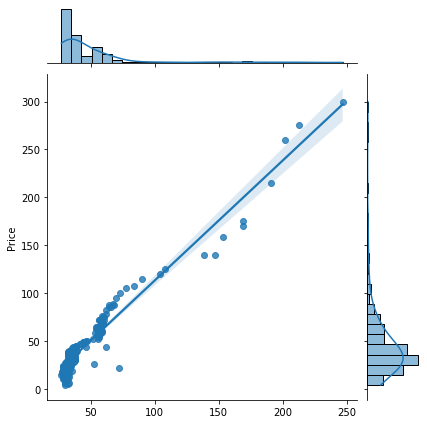

In [745]:
sns.jointplot(y_pred, y_test, kind='reg')

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


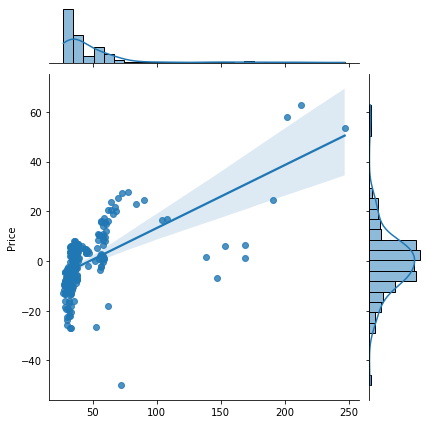

In [746]:
sns.jointplot(y_pred, y_test - y_pred, kind='reg')

In [857]:
gbm = GradientBoostingRegressor(n_estimators=500, max_depth=10, learning_rate=.002,min_samples_split=3)
gbm_fit=gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print("Gradient Boosted Regression:", r2_score(y_test, y_pred))

Gradient Boosted Regression: 0.8420748369198814


In [847]:
gbm_mse=mean_squared_error(y_test,gbm.predict(X_test))
print(gbm_mse)

387.6584165260296


C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


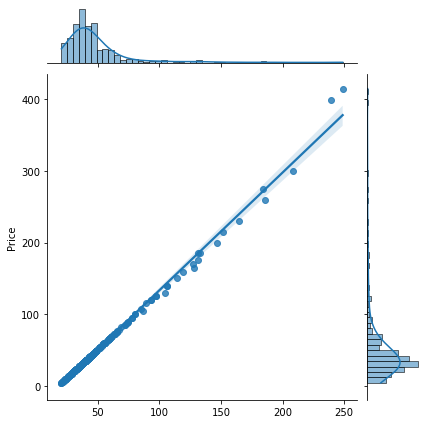

In [848]:
p=sns.jointplot(y_pred, y_test, kind='reg')
plt.xlabel('Price Predicted')
plt.savefig('Gradient Boosted Regression Plot',bbox_inches='tight',dpi=300)

C:\Users\hancc\anaconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


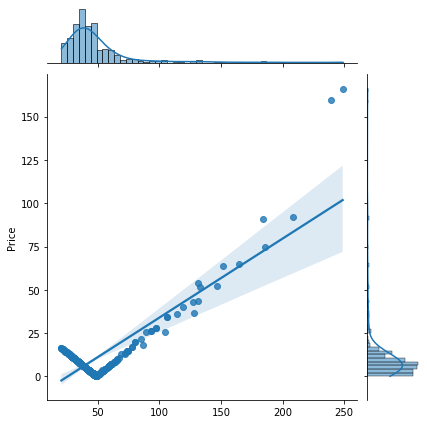

In [849]:
sns.jointplot(y_pred, abs(y_test - y_pred), kind='reg')
plt.savefig('Gradient Boosted Regression Residual',bbox_inches='tight',dpi=300)

In [623]:
def grad_cost_function(beta,x_data,y_data):
    beta=np.array(beta)
    return np.matmul(np.matmul(x_data,beta)-y_data,x_data)